## Three state Model

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Master Equation of Three State Model

![img](img/three-state.png)

For equilibrium condition, we get

$k_{co} c = k_{oc} o => c = \frac{k_{oc}}{k_{co}}$

$k_{oi} o = k_{io} i => i = \frac{k_{oi}}{k_{io}}$

$k_{ic} i = k_{ci} c$

Since, 

$ o + c + i = 1$

### Model Parameter

In [136]:
k_oi,k_oc = 0.5,0.9
k_io,k_ic = 0.3,0.72
k_co,k_ci = 0.6,0.8
dt = 0.01

### 1. Monte Carlo Simulation

In [137]:
M = {"O": [1-(k_oc + k_oi)*dt,   k_oc*dt,   k_oi*dt],
     "C": [k_co*dt,  1-(k_co + k_ci)*dt,    k_ci*dt],
     "I": [k_io*dt,  k_ic*dt,   1 - (k_io + k_ic)*dt]}

states = ["O","C","I"]

In [138]:
M["O"],M["C"],M["I"]

([0.986, 0.009000000000000001, 0.005],
 [0.006, 0.986, 0.008],
 [0.003, 0.0072, 0.9898])

In [139]:
current_state = "O"
T =1000
N =10000

SS = [["O" for n in range (T)] for t in range(N)]

for n in range(N):
    no,nc,ni =0,0,0
    for t in range(T):
        new_state = np.random.choice(states, p = M[current_state])
        #print(new_state)
        SS[n][t] = new_state
        current_state = new_state 

In [140]:
ss = np.array(SS)

In [141]:
Data = []
X = []
for t in range(T):
    X.append(t)
    o = list(ss[:,t]).count("O")/float(N)
    c = list(ss[:,t]).count("C")/float(N)
    i = list(ss[:,t]).count("I")/float(N)
    Data.append({"O":o,"C":c,"I":i})

In [142]:
DF = pd.DataFrame(Data)
DF.head()

,C,I,O
0,0.3640,0.3967,0.2393
1,0.3650,0.3958,0.2392
2,0.3638,0.3960,0.2402
3,0.3635,0.3962,0.2403
4,0.3623,0.3965,0.2412


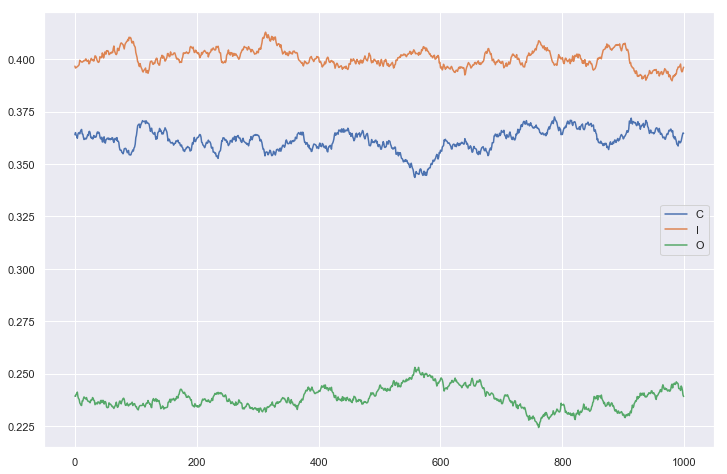

In [143]:
DF.plot(figsize = [12,8])   

In [144]:
I = 0.4
C =0.36
O = 0.24

### 2. Analytical Solution

$\large{o = \frac{1}{1 + \frac{k_{oc}}{k_{co}} + \frac{k_{oi}}{k_{io}}}}$

In [146]:
 1/(1+(k_oc/k_co)+(k_oi/k_io))

0.24

-------

$\large{o = \frac{\frac{k_{oc}}{k_{co}}}{1 + \frac{k_{oc}}{k_{co}} + \frac{k_{oi}}{k_{io}}}}$

In [147]:
 (k_oc/k_co)/(1+(k_oc/k_co)+(k_oi/k_io))

0.36

--------

$\large{o = \frac{\frac{k_{oi}}{k_{io}}}{1 + \frac{k_{oc}}{k_{co}} + \frac{k_{oi}}{k_{io}}}}$

In [148]:
 (k_oi/k_io)/(1+(k_oc/k_co)+(k_oi/k_io))

0.39999999999999997

### Linear Algebra Approach

Probabilities of Open, Closed and Inactivated states are governed by following system of ordinary differential equations:


$ o^{'} = k_{io}i + k_{oc}c - (k_{oi} + k_{oc})o$

$ c^{'} = k_{oc}o + k_{ic}i - (k_{co} + k_{ci})c$

$ i^{'} = k_{oi}o + k_{ci}c - (k_{io} + k_{ic})i$



In [169]:
B = np.array([[(k_oi + k_oc + k_io),   (k_io - k_co)],
              [ (k_ic - k_oc), (k_co + k_ci + k_ic)]])

b = np.array([k_io,k_ic])

In [170]:
Binv = np.linalg.inv(B)

In [172]:
np.dot(Binv,b), 1-0.24-0.36

(array([0.24, 0.36]), 0.4)